In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
import sklearn
print(sklearn.__version__)

1.3.1


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler

In [4]:
#from imblearn.over_sampling import SMOTE

In [5]:
#Read the CSV file and I specify the encoding and data types
PCOS_dt = pd.read_csv(r'C:\Users\User\Downloads\PCOS_data.csv', encoding='ISO-8859-1')

In [6]:
print(PCOS_dt)

     Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  \
0         1                 1           0          28         44.6   
1         2                 2           0          36         65.0   
2         3                 3           1          33         68.8   
3         4                 4           0          37         65.0   
4         5                 5           0          25         52.0   
..      ...               ...         ...         ...          ...   
536     537               537           0          35         50.0   
537     538               538           0          30         63.2   
538     539               539           0          36         54.0   
539     540               540           0          27         50.0   
540     541               541           1          23         82.0   

     Height(Cm)    BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  ...  \
0        152.000  19.3           15                78                22  ...   

In [7]:
PCOS_dt.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.9,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.3,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.7,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.1,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


##### Understanding the Dataset

###### Patient File No. : This is the report number which has data for a particular patient
###### PCOS : Polycystic ovary syndrome (PCOS) is a hormonal disorder common among women of reproductive age, we would like to determine whether the patient has this syndrome or not
###### Age (yrs) : Age of patient in years
###### Weight (Kg) : Weight of patient in kg
###### Height(Cm) : Height of patient in centimeter
###### BMI : Body mass index of the patient
###### Blood Group : Blood Group of the patient A+ = 11, A- = 12, B+ = 13, B- = 14, O+ =15, O- = 16, AB+ =17, AB- = 18 (total 8 blood groups)
###### Pulse rate(bpm) : It is the heart rate of patient in beats per minute. Resting heart rate for adults ranges from 60 to 100 beats per minute
###### RR (breaths/min) : It is the respiration rate. Normal respiration rates for an adult person at rest range from 12 to 16 breaths per minute.
###### Hb(g/dl) : Hemoglobin levels in gram per deciliter. For women, a normal level ranges between 12.3 gm/dL and 15.3 gm/dL.
###### Cycle(R/I) : ....
###### Cycle length(days) : This represents length of menstrual cycle. The length of the menstrual cycle varies from woman to woman, but the average is to have periods every 28 days.
###### Marraige Status (Yrs) : Years of marriage
###### Pregnant(Y/N) : If the patient is pregnant
###### No. of aborptions : No. of aborptions, if any. There are total 541 values out of which 437 patients never had any abortions.
###### I beta-HCG(mIU/mL) : this is case 1 of beta hcg
###### II beta-HCG(mIU/mL) : this is case 2 of beta hcg (please note: An beta hCG level of less than 5 mIU/mL is considered negative for pregnancy, and anything above 25 mIU/mL is considered positive for pregnancy) (also the unit mIU/mL is mili International Units per miliLiter)
###### FSH(mIU/mL) : Its full form is Follicle-stimulating hormone. During puberty: it ranges from 0.3 to 10.0 mIU/mL (0.3 to 10.0 IU/L) Women who are still menstruating: 4.7 to 21.5 mIU/mL (4.5 to 21.5 IU/L) After menopause: 25.8 to 134.8 mIU/mL (25.8 to 134.8 IU/L)
###### LH(mIU/mL) : It is Luteinizing Hormone.
###### FSH/LH : Ratio of FSH and LH
###### Hip(inch) : Hip size in inches
###### Waist(inch) : Waist Size in inches
###### Waist:Hip Ratio : Waist by hip ratio
###### TSH (mIU/L) : It is thyroid stimulating hormone. Normal values are from 0.4 to 4.0 mIU/L
###### AMH(ng/mL) : It is Anti-Mullerian Hormone.
###### PRL(ng/mL) : This represents Prolactin levels.
###### Vit D3 (ng/mL): Vitamin D levels. Normal vitamin D levels in the blood are 20 ng/ml or above for adults.
###### PRG(ng/mL): Progesterone levels
###### RBS(mg/dl): This value is obtained by doing Random Blood Sugar (RBS) Test.
###### Weight gain(Y/N): Is there been a weight gain
###### hair growth(Y/N): Is there been a hair growth
###### Skin darkening (Y/N): Skin darkening issues
###### Hair loss(Y/N): hair loss issues
###### Pimples(Y/N): pimples issues
###### Fast food (Y/N): is fast food part of you diet
###### Reg.Exercise(Y/N): do you do exercises on a regular basis
###### BP _Systolic (mmHg): Systolic blood pressure, measures the pressure in your arteries when your heart beats.
###### BP _Diastolic (mmHg): Diastolic blood pressure, measures the pressure in your arteries when your heart rests between beats.
###### Follicle No. (L): Follicles number in the left side
###### Follicle No. (R): Follicles number in the right side
###### Avg. F size (L) (mm): Average Follicle size in the left side in mm
###### Avg. F size (R) (mm): Average Follicle size in the right side in mm
###### Endometrium (mm): Size of Endometrium in mm

In [8]:
# Check the data types of the variables
PCOS_dt.dtypes

Sl. No                      int64
Patient File No.            int64
PCOS (Y/N)                  int64
 Age (yrs)                  int64
Weight (Kg)               float64
Height(Cm)                float64
BMI                       float64
Blood Group                 int64
Pulse rate(bpm)             int64
RR (breaths/min)            int64
Hb(g/dl)                  float64
Cycle(R/I)                  int64
Cycle length(days)          int64
Marraige Status (Yrs)     float64
Pregnant(Y/N)               int64
No. of abortions            int64
  I   beta-HCG(mIU/mL)    float64
II    beta-HCG(mIU/mL)     object
FSH(mIU/mL)               float64
LH(mIU/mL)                float64
FSH/LH                    float64
Hip(inch)                   int64
Waist(inch)                 int64
Waist:Hip Ratio           float64
TSH (mIU/L)               float64
AMH(ng/mL)                 object
PRL(ng/mL)                float64
Vit D3 (ng/mL)            float64
PRG(ng/mL)                float64
RBS(mg/dl)    

## Quick EDA (Exploratory Data Analysis)

In [9]:
print(PCOS_dt.shape)

(541, 45)


In [10]:
PCOS_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [11]:
PCOS_dt.isnull().sum()

Sl. No                      0
Patient File No.            0
PCOS (Y/N)                  0
 Age (yrs)                  0
Weight (Kg)                 0
Height(Cm)                  0
BMI                         0
Blood Group                 0
Pulse rate(bpm)             0
RR (breaths/min)            0
Hb(g/dl)                    0
Cycle(R/I)                  0
Cycle length(days)          0
Marraige Status (Yrs)       1
Pregnant(Y/N)               0
No. of abortions            0
  I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)      0
FSH(mIU/mL)                 0
LH(mIU/mL)                  0
FSH/LH                      0
Hip(inch)                   0
Waist(inch)                 0
Waist:Hip Ratio             0
TSH (mIU/L)                 0
AMH(ng/mL)                  0
PRL(ng/mL)                  0
Vit D3 (ng/mL)              0
PRG(ng/mL)                  0
RBS(mg/dl)                  0
Weight gain(Y/N)            0
hair growth(Y/N)            0
Skin darkening (Y/N)        0
Hair loss(

In [12]:
PCOS_dt.dropna()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
180,181,181,1,30,70.0,150.0,31.1,16,74,18,...,1.0,0,120,80,8,6,12.0,11.0,4.5,.
363,364,364,0,31,48.0,152.0,20.8,17,72,18,...,1.0,0,110,80,1,3,13.0,13.0,7.0,7


In [13]:
PCOS_dt['II    beta-HCG(mIU/mL)'] = pd.to_numeric(PCOS_dt['II    beta-HCG(mIU/mL)'],errors='coerce')
PCOS_dt['AMH(ng/mL)'] = pd.to_numeric(PCOS_dt['AMH(ng/mL)'],errors='coerce')

In [14]:
PCOS_dt.drop('Unnamed: 44',axis=1,inplace=True)

In [15]:
PCOS_dt.keys()

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of abortions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

In [16]:
PCOS_dt.corr()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
Sl. No,1.000000,1.000000,0.060998,0.067133,-0.082823,-0.011700,-0.082840,0.001705,-0.044533,-0.015196,...,0.160834,0.154135,0.000110,0.013399,0.009798,0.049658,0.086969,0.289706,0.244608,0.027219
Patient File No.,1.000000,1.000000,0.060998,0.067133,-0.082823,-0.011700,-0.082840,0.001705,-0.044533,-0.015196,...,0.160834,0.154135,0.000110,0.013399,0.009798,0.049658,0.086969,0.289706,0.244608,0.027219
PCOS (Y/N),0.060998,0.060998,1.000000,-0.168513,0.211938,0.068254,0.199697,0.036433,0.091821,0.036928,...,0.286077,0.377933,0.065337,0.007942,0.038032,0.603346,0.648327,0.132992,0.097690,0.106648
Age (yrs),0.067133,0.067133,-0.168513,1.000000,-0.029734,-0.119819,0.021372,-0.010954,0.045831,0.087382,...,-0.032921,-0.037694,-0.025911,0.073587,0.066788,-0.110793,-0.159395,-0.016352,-0.079250,-0.104238
Weight (Kg),-0.082823,-0.082823,0.211938,-0.029734,1.000000,0.420098,0.901688,0.072682,0.019983,0.043614,...,0.063983,0.162015,-0.068236,0.027608,0.131402,0.173751,0.124290,-0.021368,-0.073207,-0.010100
Height(Cm),-0.011700,-0.011700,0.068254,-0.119819,0.420098,1.000000,-0.006845,0.040825,-0.074339,-0.029459,...,0.061129,0.032418,0.012943,-0.067959,0.011116,0.106189,0.075358,-0.026705,0.059426,-0.054035
BMI,-0.082840,-0.082840,0.199697,0.021372,0.901688,-0.006845,1.000000,0.061328,0.050507,0.061579,...,0.045535,0.159296,-0.080660,0.069737,0.140062,0.143110,0.104425,-0.011736,-0.111427,0.009327
Blood Group,0.001705,0.001705,0.036433,-0.010954,0.072682,0.040825,0.061328,1.000000,0.047572,-0.023766,...,0.039029,-0.035090,0.064035,0.030898,0.054014,0.061332,0.013974,-0.035667,-0.015725,-0.015335
Pulse rate(bpm),-0.044533,-0.044533,0.091821,0.045831,0.019983,-0.074339,0.050507,0.047572,1.000000,0.303804,...,-0.003039,0.059804,-0.038881,-0.025510,0.007623,0.040390,0.049182,-0.048356,-0.034202,-0.041241
RR (breaths/min),-0.015196,-0.015196,0.036928,0.087382,0.043614,-0.029459,0.061579,-0.023766,0.303804,1.000000,...,0.029242,0.135479,-0.047451,0.017323,0.052631,0.069731,0.012441,-0.031051,-0.021893,-0.063930


In [17]:
# Sort the Series in descending order
correlation_with_target = PCOS_dt.corr()['PCOS (Y/N)'].abs().sort_values(ascending=False)

print(correlation_with_target)

PCOS (Y/N)                1.000000
Follicle No. (R)          0.648327
Follicle No. (L)          0.603346
Skin darkening (Y/N)      0.475733
hair growth(Y/N)          0.464667
Weight gain(Y/N)          0.441047
Cycle(R/I)                0.401644
Fast food (Y/N)           0.377933
Pimples(Y/N)              0.286077
AMH(ng/mL)                0.263863
Weight (Kg)               0.211938
BMI                       0.199697
Cycle length(days)        0.178480
Hair loss(Y/N)            0.172879
 Age (yrs)                0.168513
Waist(inch)               0.164598
Hip(inch)                 0.162297
Avg. F size (L) (mm)      0.132992
Marraige Status (Yrs)     0.112897
Endometrium (mm)          0.106648
Avg. F size (R) (mm)      0.097690
Pulse rate(bpm)           0.091821
Hb(g/dl)                  0.087170
Vit D3 (ng/mL)            0.085494
Height(Cm)                0.068254
Reg.Exercise(Y/N)         0.065337
LH(mIU/mL)                0.063879
Sl. No                    0.060998
Patient File No.    

#### PCOS is correlated to Follicle Number, Cycle(R/I)

In [18]:
PCOS_dt

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.000,19.3,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.500,24.9,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.000,25.3,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.000,29.7,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.000,20.1,11,72,18,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537,537,0,35,50.0,164.592,18.5,17,72,16,...,0,0.0,0,110,70,1,0,17.5,10.0,6.7
537,538,538,0,30,63.2,158.000,25.3,15,72,18,...,0,0.0,0,110,70,9,7,19.0,18.0,8.2
538,539,539,0,36,54.0,152.000,23.4,13,74,20,...,0,0.0,0,110,80,1,0,18.0,9.0,7.3
539,540,540,0,27,50.0,150.000,22.2,15,74,20,...,1,0.0,0,110,70,7,6,18.0,16.0,11.5


In [19]:
#Identifying numerical and categorical features in dataframe
numerical_variables = []
categorical_variables = []
for x in PCOS_dt.columns:
    if len(PCOS_dt[x].value_counts()) < 9:
        if x not in ["RR (breaths/min)", "Cycle(R/I)", "No. of aborptions", "BP _Systolic (mmHg)", "BP _Diastolic (mmHg)"]:
            categorical_variables.append(x)
    else:
        numerical_variables.append(x)

## Analysis using different plots

### 1. Distribution of PCOS Cases Across Age Groups

In [20]:
# Define age group bins and labels
age_groups = [0,18,25,35,45,float('inf')]
age_labels = ['<18','18-25','26-35','36-45','45+']
PCOS_dt['Age Group'] = pd.cut(PCOS_dt[' Age (yrs)'],bins = age_groups,labels = age_labels)

In [21]:
# Categorize the 'Age (yrs)' column into age groups
age_group_counts = PCOS_dt.groupby(['Age Group', 'PCOS (Y/N)']).size().unstack()
type(age_group_counts)

pandas.core.frame.DataFrame

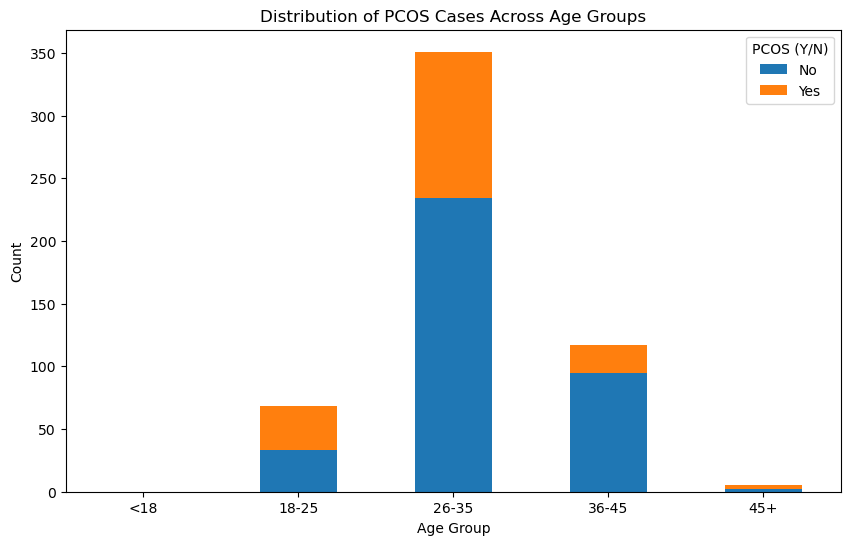

In [22]:
age_group_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of PCOS Cases Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='PCOS (Y/N)', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.show()

#### It can be observed from above plot that PCOS affects mainly the age group of 26-35.

## 2. Distribution analysis for numerical attributes

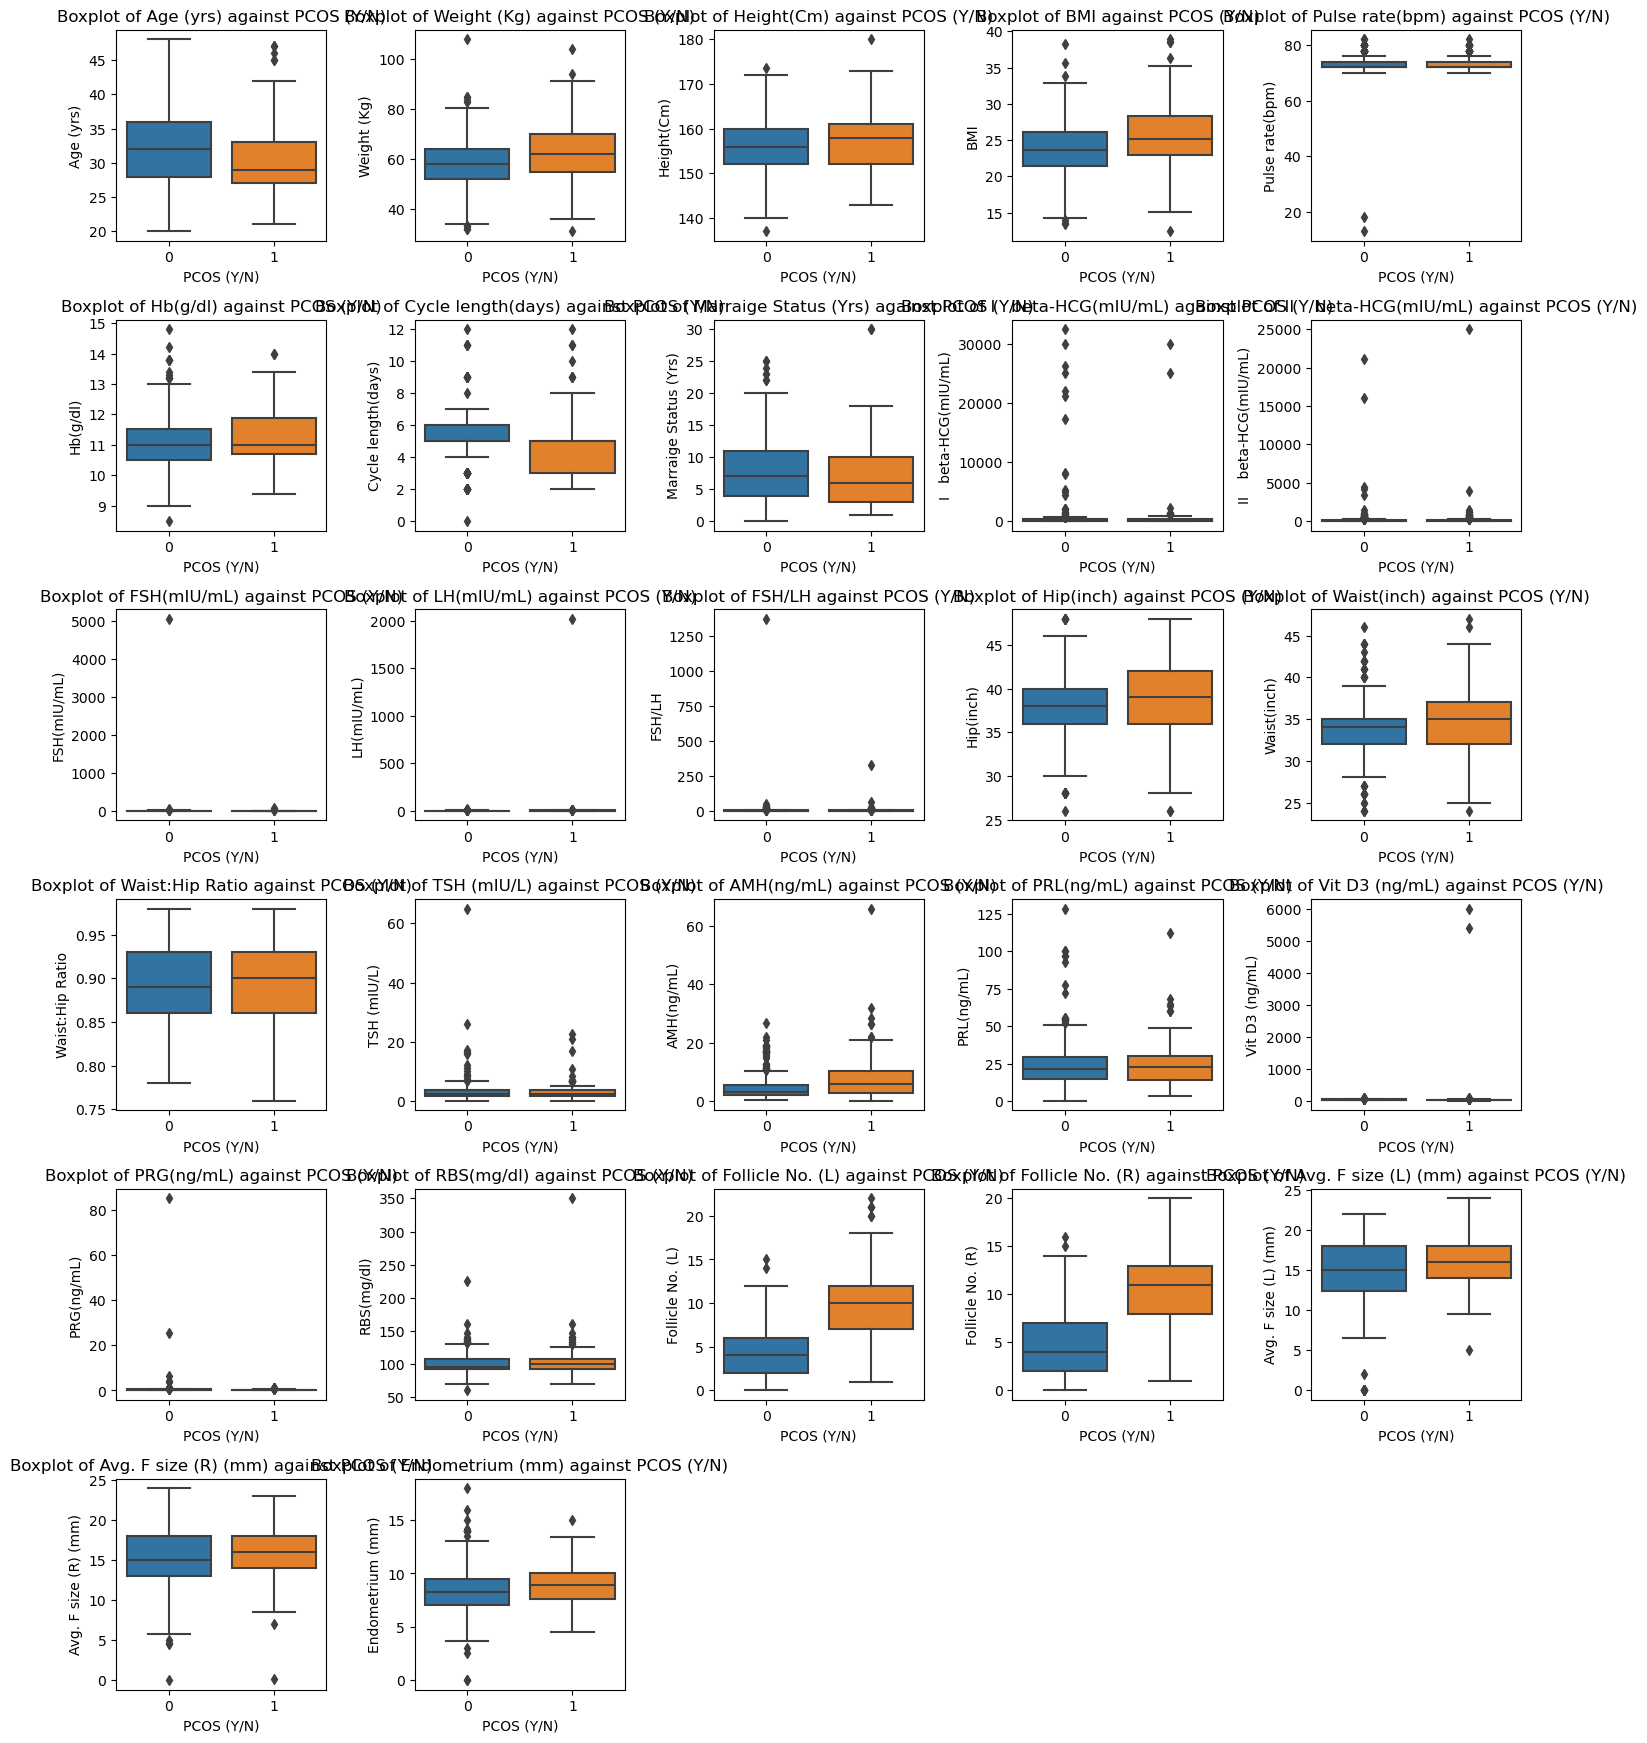

In [84]:
# Remove leading and trailing spaces from column names
PCOS_dt.columns = PCOS_dt.columns.str.strip()


# Ploting for numerical Variables
# List of numerical variables I want to plot
numerical_variables = ['Age (yrs)', 'Weight (Kg)', 'Height(Cm)', 'BMI', 'Pulse rate(bpm)', 
                       'Hb(g/dl)', 'Cycle length(days)', 'Marraige Status (Yrs)', 
                       'I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 
                       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 
                       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 
                       'PRG(ng/mL)', 'RBS(mg/dl)', 'Follicle No. (L)', 'Follicle No. (R)', 
                       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)']

# Create a single figure for all boxplots
plt.figure(figsize=(15, 20))

# Plot boxplots for each numerical variable against 'PCOS (Y/N)'
for i, variable in enumerate(numerical_variables, 1):
    plt.subplot(7, 5, i)
    sns.boxplot(x='PCOS (Y/N)', y=variable, data=PCOS_dt)
    plt.title(f'Boxplot of {variable} against PCOS (Y/N)')

# Adjust layout for better appearance
plt.tight_layout()
plt.show()

###### Observations from boxplot -  Higher the follicle number more the tendancy of PCOS, Patients with lower cycle lengths means more tendancy of PCOS, The average age of patients diagnosed with PCOS is 30 years

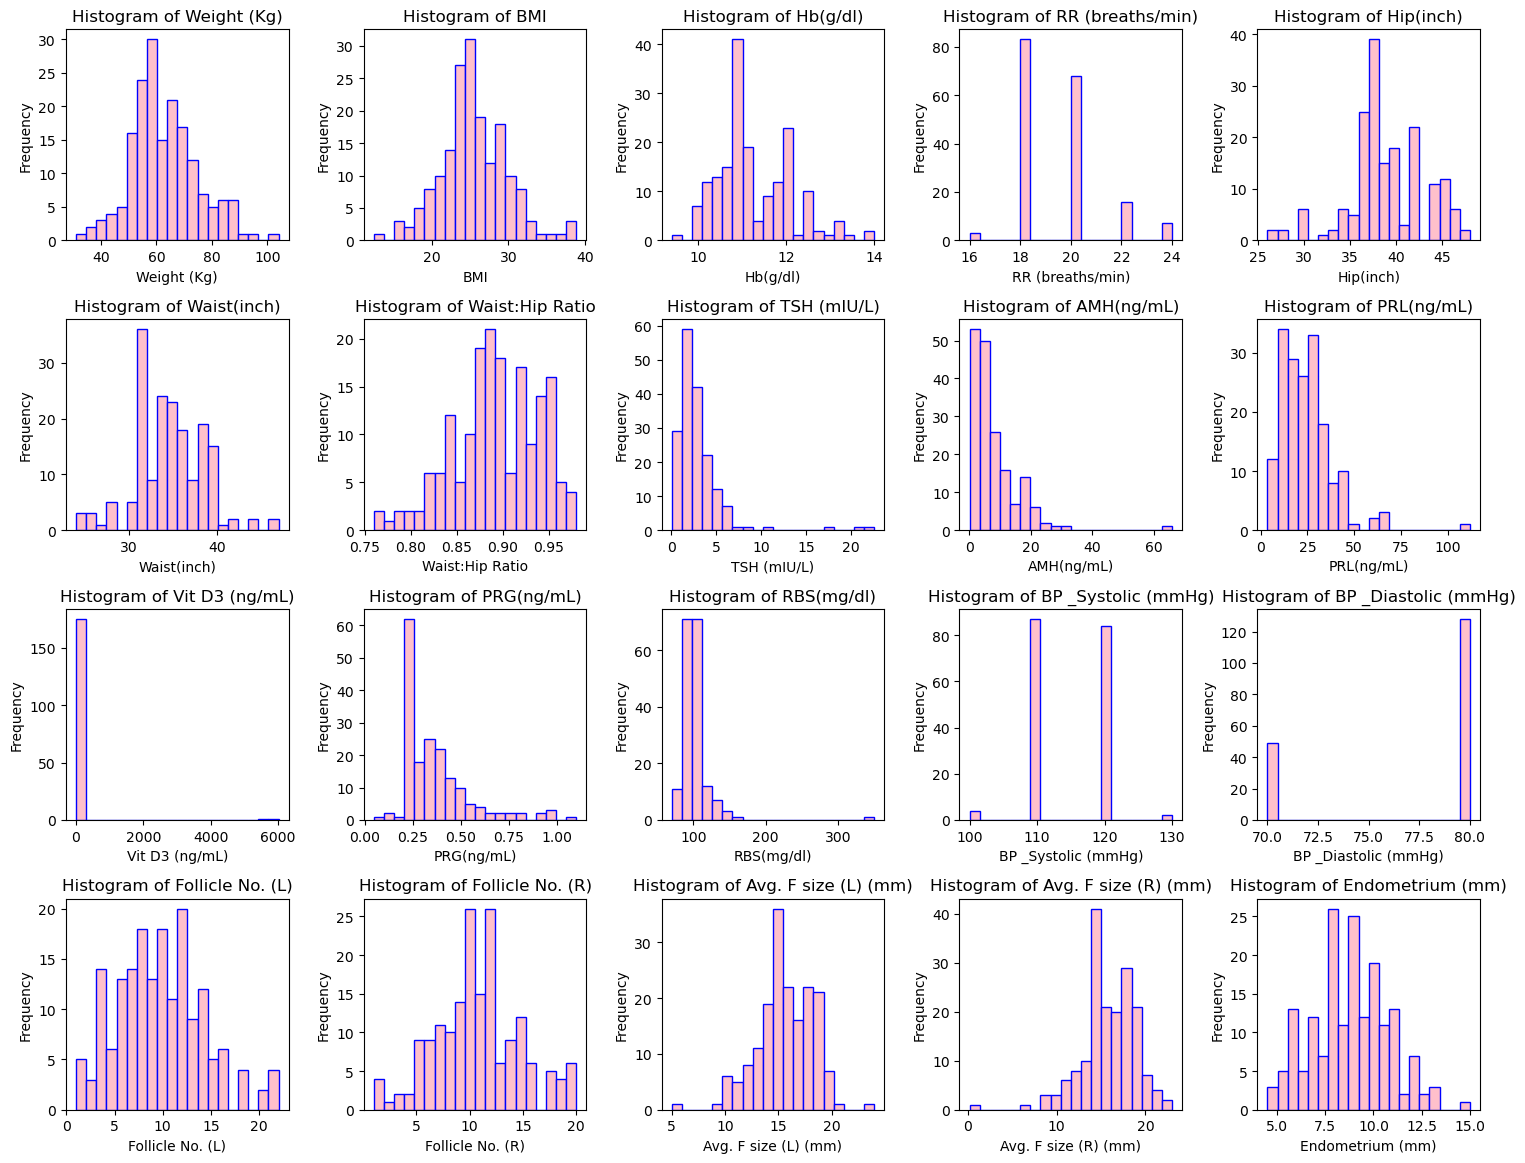

In [79]:
# List of important numerical attributes for distribution analysis
numerical_attributes = ['Weight (Kg)', 'BMI', 'Hb(g/dl)','RR (breaths/min)',
                        'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)',
                        'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)',
                        'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)',
                        'Endometrium (mm)']
pcos_df = PCOS_dt[PCOS_dt['PCOS (Y/N)']==1]

# Create a single figure for all histograms
plt.figure(figsize=(15, 20))

# Create histograms for each numerical attribute
for i, attribute in enumerate(numerical_attributes, 1):
    plt.subplot(7, 5, i)
    plt.hist(pcos_df[attribute], bins=20, color='pink', edgecolor='blue')
    plt.title(f'Histogram of {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Frequency')

# Adjust layout for better appearance
plt.tight_layout()
plt.show()

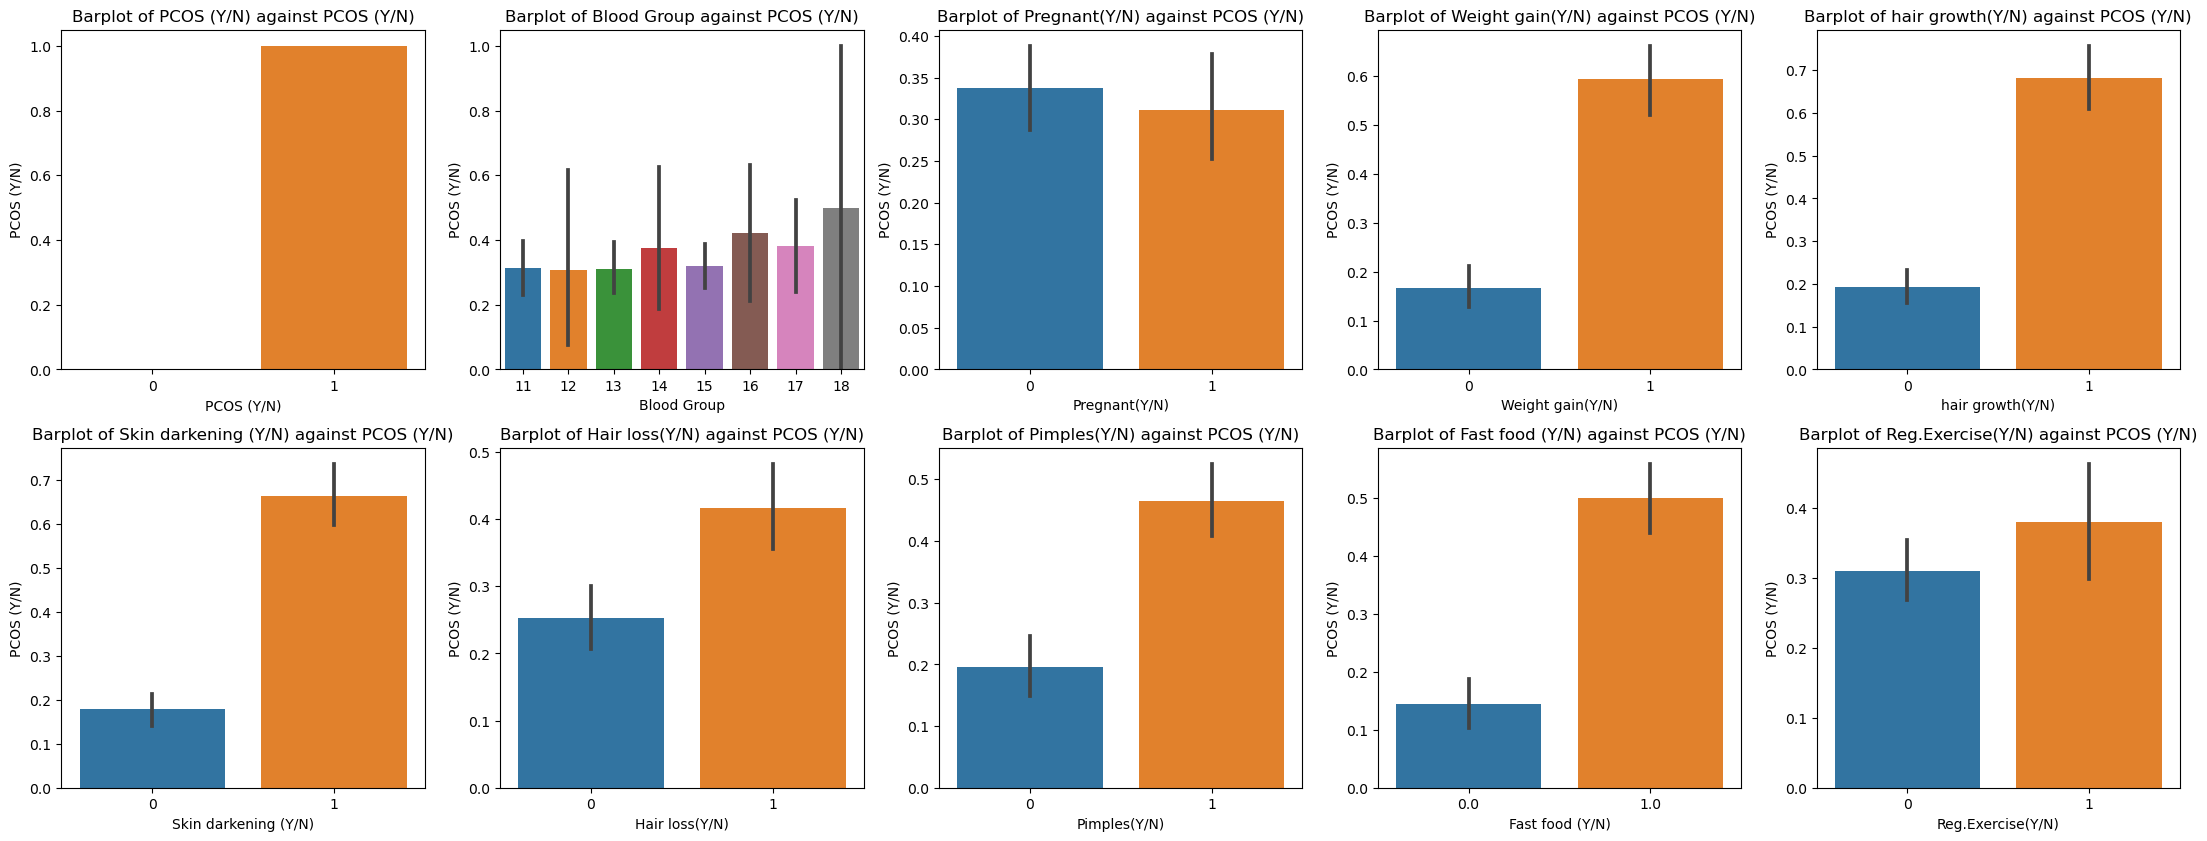

In [90]:
# Ploting for numerical Variables
# List of Categorical variables you want to plot
categorical_variables = ['PCOS (Y/N)', 'Blood Group', 'Pregnant(Y/N)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
                         'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)','Reg.Exercise(Y/N)']
# Create a single figure for all histograms
plt.figure(figsize=(22, 29))
# Plot barplots for each categorical variable against 'PCOS (Y/N)'
for i, variable in enumerate(categorical_variables, 1):
    plt.subplot(7, 5, i)  # Adjust the grid dimensions as needed
    sns.barplot(x=variable, y='PCOS (Y/N)', data=PCOS_dt)
    plt.title(f'Barplot of {variable} against PCOS (Y/N)')

# Adjust layout for better appearance
plt.tight_layout()
plt.show()

In [26]:
PCOS_dt["PCOS (Y/N)"].value_counts()

PCOS (Y/N)
0    364
1    177
Name: count, dtype: int64

In [27]:
177/(364 + 177)*100

32.71719038817005

#### 32% of patients in our dataset are those having PCOS syndrome

### 2. Feature Selection

In [30]:
# Sort the Series in descending order
top_10_features = correlation_with_target.head(11).sort_values(ascending=False).reset_index()
top_10_features.columns = ['Variable', 'Correlation']
print(top_10_features)

                Variable  Correlation
0             PCOS (Y/N)     1.000000
1       Follicle No. (R)     0.648327
2       Follicle No. (L)     0.603346
3   Skin darkening (Y/N)     0.475733
4       hair growth(Y/N)     0.464667
5       Weight gain(Y/N)     0.441047
6             Cycle(R/I)     0.401644
7        Fast food (Y/N)     0.377933
8           Pimples(Y/N)     0.286077
9             AMH(ng/mL)     0.263863
10           Weight (Kg)     0.211938


In [31]:
PCOS_dt_new = PCOS_dt[['PCOS (Y/N)','Follicle No. (R)', 'Follicle No. (L)',  'Skin darkening (Y/N)', 'hair growth(Y/N)', 'Weight gain(Y/N)', 'Cycle(R/I)', 'Fast food (Y/N)', 'Pimples(Y/N)', 'AMH(ng/mL)', 'Weight (Kg)']]

In [32]:
# Save the updated DataFrame to a new CSV file
PCOS_dt_new.to_csv('cleaned.csv', index=False)

# display the updated dataframe
print(PCOS_dt_new)

     PCOS (Y/N)  Follicle No. (R)  Follicle No. (L)  Skin darkening (Y/N)  \
0             0                 3                 3                     0   
1             0                 5                 3                     0   
2             1                15                13                     0   
3             0                 2                 2                     0   
4             0                 4                 3                     0   
..          ...               ...               ...                   ...   
536           0                 0                 1                     0   
537           0                 7                 9                     0   
538           0                 0                 1                     0   
539           0                 6                 7                     0   
540           1                10                 9                     1   

     hair growth(Y/N)  Weight gain(Y/N)  Cycle(R/I)  Fast food (Y/N)  \
0  

In [33]:
PCOS_dt_new.isnull().sum()

PCOS (Y/N)              0
Follicle No. (R)        0
Follicle No. (L)        0
Skin darkening (Y/N)    0
hair growth(Y/N)        0
Weight gain(Y/N)        0
Cycle(R/I)              0
Fast food (Y/N)         1
Pimples(Y/N)            0
AMH(ng/mL)              1
Weight (Kg)             0
dtype: int64

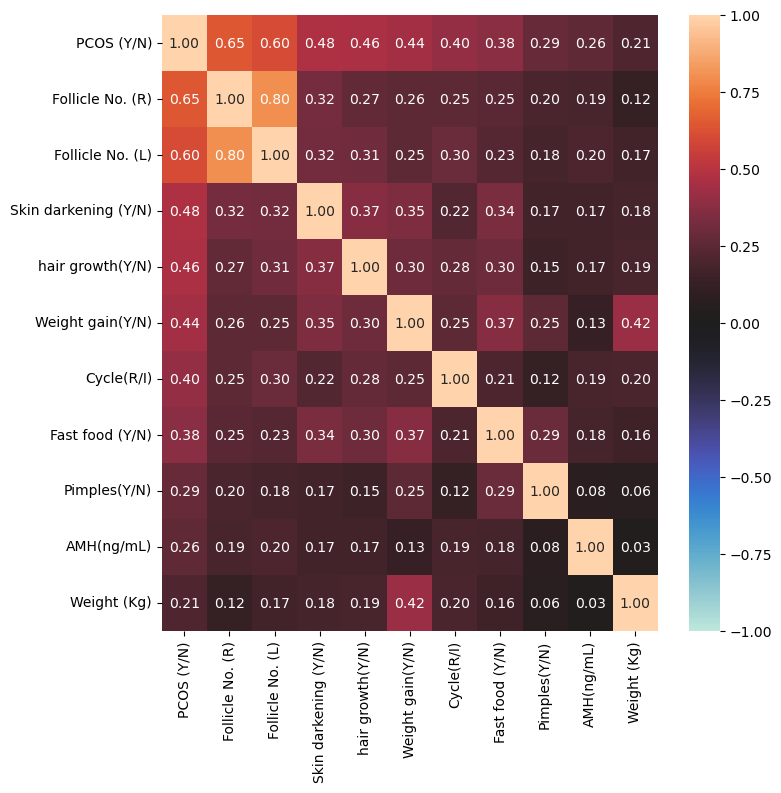

In [34]:
plt.figure(figsize=(8, 8))
sns.heatmap(PCOS_dt_new.corr(), annot=True, vmin=-1, vmax=1, center=0, fmt='.2f')
plt.show()

In [35]:
PCOS_dt_new['PCOS (Y/N)'].value_counts()

PCOS (Y/N)
0    364
1    177
Name: count, dtype: int64

In [36]:
PCOS_dt_new.dropna(inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_36932\3278809022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PCOS_dt_new.dropna(inplace=True)


In [37]:
PCOS_dt_new.isnull().sum()

PCOS (Y/N)              0
Follicle No. (R)        0
Follicle No. (L)        0
Skin darkening (Y/N)    0
hair growth(Y/N)        0
Weight gain(Y/N)        0
Cycle(R/I)              0
Fast food (Y/N)         0
Pimples(Y/N)            0
AMH(ng/mL)              0
Weight (Kg)             0
dtype: int64

# PCOS Detection using Built-in Logistic regression

In [38]:
X = PCOS_dt_new.drop(['PCOS (Y/N)'],axis=1)
y = PCOS_dt_new['PCOS (Y/N)']

In [39]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: PCOS (Y/N), dtype: int64

In [40]:
# Normalize the data
sc = StandardScaler()
X = sc.fit_transform(X)

In [41]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [42]:
X_train

array([[-1.27100451, -0.97719669,  1.50554531, ...,  1.02062073,
         0.74387253, -1.32825579],
       [ 1.65665117,  2.33098017,  1.50554531, ...,  1.02062073,
         1.35595207, -0.42195809],
       [ 0.08022119,  0.67689174,  1.50554531, ..., -0.9797959 ,
         0.59085264,  1.07343312],
       ...,
       [-0.82059594, -0.97719669, -0.66421116, ...,  1.02062073,
        -0.41227771, -0.35851725],
       [ 1.20624261,  0.67689174,  1.50554531, ...,  1.02062073,
         0.40382834,  1.02811824],
       [ 1.20624261,  1.38578678,  1.50554531, ...,  1.02062073,
         0.75577408,  0.42089878]])

In [43]:
y_train

463    0
232    1
448    0
451    1
450    1
      ..
71     0
106    0
271    0
437    1
102    1
Name: PCOS (Y/N), Length: 431, dtype: int64

In [44]:
logregPCOS = LogisticRegression()

#### To train the model

In [45]:
logregPCOS.fit(X_train,y_train)

LogisticRegression()

#### To test the model

In [46]:
y_pred = logregPCOS.predict(X_test)

In [47]:
accuracy = accuracy_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8888888888888888
Confusion Matrix:
[[74  5]
 [ 7 22]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92        79
           1       0.81      0.76      0.79        29

    accuracy                           0.89       108
   macro avg       0.86      0.85      0.86       108
weighted avg       0.89      0.89      0.89       108



In [48]:
#x_test[3]
#sc.inverse_transform([x_test[1]])

In [49]:
test_row=[[0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  7.00000000e+01,
         2.63000000e+01,  5.00000000e+00,  0.00000000e+00,
         2.60000000e+01,  4.00000000e+01,  4.50000000e+01,
         1.63000000e+02, -2.77555756e-17,  0.00000000e+00,
         2.00000000e+00,  9.20000000e+01,  8.00000000e+01,
         8.90000000e-01,  1.10000000e+02]]

#logregPCOS.predict(sc.transform(test_row))

# PCOS Detection using Built-in Random Forest

In [50]:
def print_scores(m, X_train, y_train, X_test, y_test):
    train_roc_auc = roc_auc_score(y_train, m.predict_proba(X_train)[:, 1])
    test_roc_auc = roc_auc_score(y_test, m.predict_proba(X_test)[:, 1])
    print("Training ROC AUC:", train_roc_auc)
    print("Test ROC AUC:", test_roc_auc)

In [51]:
# Assuming you have defined x_train, y_train, x_test, and y_test before this point
rf = RandomForestClassifier(n_jobs=-1, n_estimators=150, max_features='sqrt', min_samples_leaf=10)
rf.fit(X_train, y_train)
print("ROC AUC Scores:")
print_scores(rf, X_train, y_train, X_test, y_test)

ROC AUC Scores:
Training ROC AUC: 0.9761245344284214
Test ROC AUC: 0.9345264076822348


In [52]:
y_predrf = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_predrf)
conft_matrix = confusion_matrix(y_test, y_predrf)
classification_rep = classification_report(y_test, y_predrf)

print("Accuracy:", accuracy)
print("\nConfusion Matrix: \n",conft_matrix)
print("\nClassification Report: \n",classification_rep)

Accuracy: 0.8888888888888888

Confusion Matrix: 
 [[75  4]
 [ 8 21]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.95      0.93        79
           1       0.84      0.72      0.78        29

    accuracy                           0.89       108
   macro avg       0.87      0.84      0.85       108
weighted avg       0.89      0.89      0.89       108



# PCOS Detection using Built-in KNN

In [53]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
yknn_pred = knn.predict(X_test)

In [54]:
# Making predictions on the test set
accuracy = accuracy_score(y_test, yknn_pred)
print('Accuracy of K-nearest Neighbor classifier on test set:', accuracy)

confusion_matrix = confusion_matrix(y_test, yknn_pred)
print('\nThe confusion Matrix is : \n',confusion_matrix)

print('\nThe evaluation parameters are : \n',classification_report(y_test, yknn_pred))

Accuracy of K-nearest Neighbor classifier on test set: 0.8981481481481481

The confusion Matrix is : 
 [[77  2]
 [ 9 20]]

The evaluation parameters are : 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93        79
           1       0.91      0.69      0.78        29

    accuracy                           0.90       108
   macro avg       0.90      0.83      0.86       108
weighted avg       0.90      0.90      0.89       108



In [55]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [56]:
import pickle
# Save your trained model using pickle
file_name = 'final_model.sav'

In [57]:
scaledfile_name = 'scaler.pkl'

In [58]:
pickle.dump(knn, open(file_name, 'wb'))
pickle.dump(sc, open(scaledfile_name, 'wb'))

In [59]:
# Load the saved model using pickle
loaded_model = pickle.load(open(file_name, 'rb'))

In [60]:
# Load the saved model using pickle
scaled_model = pickle.load(open(scaledfile_name, 'rb'))

In [61]:
#(Skin darkening (Y/N) = st.sidebar.selectbox('Year', ('Yes', 'No'))
    #hair growth(Y/N) = st.sidebar.selectbox('Year', ('Yes', 'No'))
    #Weight gain(Y/N) (Y/N) = st.sidebar.selectbox('Year', ('Yes', 'No'))
    #Fast food (Y/N) = st.sidebar.selectbox('Year', ('Yes', 'No'))
    #Pimples(Y/N) = st.sidebar.selectbox('Year', ('Yes', 'No'))
    #)

In [62]:
#slider_values[n_label] = st.sidebar.slider(n_label, min_value= float(0), max_value=float(data[default_value].max()), step=1, value=0)